# Regresión Logística y Descenso de Gradiente

Carlos Serrano Valera

13/11/2020

Esta práctica consiste en la definición de una función de costes de una Regresión Logística. El objetivo es calcular el descenso de gradiente para optimizar dicha función. Todo el proceso se realizará con funciones básicas de Python. Para ello, contamos con una base de datos que contiene 100 observaciones con los resultados de dos pruebas y una tercera variable que indica el resultado de las pruebas: 1 para los aporbados y 0 para los suspensos.

### Librerías

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### Carga de datos

In [15]:
data = pd.read_csv('4_1_data.csv')
data.head()


,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [16]:
data.tail()

,score-1,score-2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Visualización previa

In [18]:
# Seleccionamos los valores de las columnas de score-1 y score-2 y generamos una lista llamada puntuaciones

puntuaciones = data[['score-1', 'score-2']].values 

# Mismo procedimiento para la columna de label. En este caso lo asignamos a resultados

resultados = data['label'].values

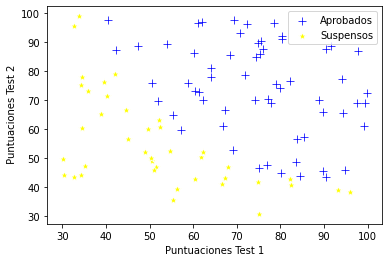

In [19]:
apro = (resultados == 1).reshape(100, 1) # Creamos apro(aprobado) cuando resultados es igual a 1, y la lista creada tendrá 100 filas y una columna
suspe = (resultados == 0).reshape(100, 1) # Mismo procedmiento para los susp (suspensos)

# Creamos un "lienzo" para graficar sobre él, llamado ax
# Vamos a tener dos scatter plot en el mismo lienzo

ax = sns.scatterplot(x = puntuaciones[apro[:, 0], 0], # Cogemos todos los aprobados en el test 1
                     y = puntuaciones[apro[:, 0], 1], # Todos los aprobados en el test 2
                     marker = "+",     # tipo de punto en el gráfico
                     color = "blue",  # color de los puntos
                     s = 70)           # tamaño de los puntos

sns.scatterplot(x = puntuaciones[suspe[:, 0], 0],  # Todos los suspensos en el test 1
                y = puntuaciones[suspe[:, 0], 1],  # Suspensos en el test 2
                marker = "*",
                color = "yellow",
                s = 70)

ax.set(xlabel = "Puntuaciones Test 1", ylabel = " Puntuaciones Test 2") # Damos nombres a los ejes
ax.legend(["Aprobados", "Suspensos"])  # establecemos la leyenda 
plt.show();

### Definimos la función Sigmoide  $\sigma(z)$

En Regresión Logística, el comportamiento de las variables se pueden explicar normalmente por la función sigmoide, donde dado una $$x$$ e $$y$$ se encuentre una y predicha $$y'$$ tal que  $$y'  = P(y=1|x)$$ donde $$0 ≤  y'  ≤ 1$$

Por tanto, la función sigmoide se define por lo siguiente:
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [21]:
# Definimos una función que calcule: 1 partido de 1 + e elevado a menos x
def funcion_sigmoide(x):    
    return 1/ (1 + np.exp(-x))

In [22]:
funcion_sigmoide(0)

0.5

### Función de Coste y Gradiente

El objetivo de la regresión logística es optimizar la función de coste

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

donde el gradiente de esa función viene dado por

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [23]:
def funcion_coste (theta, x, y):  # Tres parámetros: theta, x e y
    m = len(y)            # objeto m con la longitud de y
    
    y_pred = funcion_sigmoide(np.dot(x , theta))  # Multiplicamos los parametros "theta" y "x" y le aplicamos la función 
    # sigmoide antes definida, para calcular la y_predicha. En la notación se identifica como h0(x^i).Es la predicción de y
    
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) # el error es el logaritmo de la predicción de "y" 
    # multiplicado por el valor real de "y", más el resto de "y" real por el logaritmo del resto de la "y_pred"
    # Es decir, lo que "y predicha" explica de "y" real más todo lo que no es "y predicha" explica de todo lo que no es "y" real
    # Si "y_pred" se diferencia mucho de "y" real, el valor del error será grande y viceversa.
    
    coste = -1 / m * sum(error) # Para calcular el coste se suman todas los errores y se divide por m observaciones
    # Se añade un menos al principio para que el coste salga positivo
    
    gradiente = 1 / m * np.dot(x.transpose(), (y_pred - y)) # Por último el gradiente es la derivada del coste en función de 
    # theta. Lo obtenemos con las transpuesta de x multiplicado por la diferencia de "y predicha" menos "y" real
    
    return coste[0] , gradiente

### Coste y gradiente incial

In [24]:
media_puntos = np.mean(puntuaciones, axis = 0)
std_puntos = np.std(puntuaciones, axis = 0)
puntuaciones = (puntuaciones - media_puntos) / std_puntos # Estandardizatción de puntuaciones

filas = puntuaciones.shape[0]  # numero de filas 
cols = puntuaciones.shape[1]   # numero de columnas

X = np.append(np.ones((filas, 1)), puntuaciones, axis = 1) # incluimos término constante con las 100 filas
y = resultados.reshape(filas, 1)  # una unica columna de resultados para definir Y 

theta_init = np.zeros((cols + 1, 1)) # theta inicial definido por una columna de 3 0s
coste, gradiente = funcion_coste(theta_init, X, y) # coste y gradiente iniciales definido por la X, Y y theta inicial

print("Coste inicial", coste)
print("Gradiente inicial:", gradiente)

Coste inicial 0.693147180559946
Gradiente inicial: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Descenso de Gradiente

Minimizamos la función de coste $J(\theta)$ actualizando la siguiente ecuación y repitiendo hasta convergencia $\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ 

In [25]:
def descenso_gradiente(x, y, theta, alpha, iteraciones):  # definimos funcion de gradiente con cinco parámetros
    # alpha es la curva de aprendizaje
    
    costes = [] # array vacío de costes que se va a rellenar más tarde
    
    for i in range(iteraciones): # En cada iteración 
        coste, gradiente = funcion_coste(theta, x, y)  # calculamos el coste y el gradiente con funcion-coste
        theta -= (alpha * gradiente)   # el theta, definido por la curva de apendizaje y el gradiente
        # A theta le vamos restando la multiplicacion del gradiente por el alpha
        costes.append(coste) # vamos añadiendo al array costes, los resultados en coste de las iteraciones
    return theta, costes

In [26]:
theta, costes = descenso_gradiente(X, y, theta_init, 0.1, 15000)

In [27]:
print("Theta despúes del descenso del gradiente:", theta)
print("Coste:", costes[-1])  # El coste calculado en la última iteración - va a ser el más pequeño posible

Theta despúes del descenso del gradiente: [[1.71835124]
 [3.99257782]
 [3.7249335 ]]
Coste: 0.20349770187368266


### Convergencia de Costes 

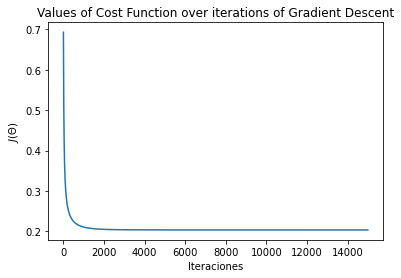

In [28]:
plt.plot(costes)          # Dibujamos los costes
plt.xlabel("Iteraciones") # En función de las iteraciones calculadas
plt.ylabel("$J(\Theta)$") # Costes
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Referencia

- https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide
- https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb